In [5]:
import os
os.chdir("..")
import torch
from torch import nn
import multiprocessing
import h5py
from utils.readers import Fastq_Read
from utils.utils_func import *
import matplotlib.pyplot as plt

In [6]:
fastq_path = "/public1/YHC/QiTanTechData/ara_res/split_fastq/reads_0051_FA059472-07AA-4E8A-9633-BADF969C0DBE.fastq"
h5_path = "/mnt/sdi2/ara/reads_0051_FA059472-07AA-4E8A-9633-BADF969C0DBE.h5"

In [7]:
fastq_l = []
for line in open(fastq_path):
    fastq_l.append(line)
h5 = h5py.File(h5_path, 'r')

In [8]:
base_sig_pair = []
base_dict = {"A":[],"C":[],"G": [], "T":[]}

for i in range(int(len(fastq_l) / 4)):
    info = fastq_l[4 * i]
    seq = fastq_l[4 * i + 1]
    c = fastq_l[4 * i + 2]
    qual = fastq_l[4 * i + 3]
    f = Fastq_Read(info, seq, qual)
    signal = h5['Raw_data'][f.read_id][()]
    base2signal = f.get_base2signal()
    # if f.seq.find("ACGTTACATGT") > 0:
    #     break
    break
for base in base_dict.keys():
    base_dict[base] = np.array(base_dict[base])

In [30]:
st = 1849
ed = 1869
base2signal[st:ed]
f.seq[st:ed]

'TTTCTTTCTGTTTAAAATGA'

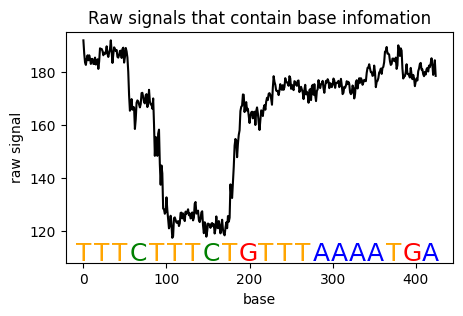

In [31]:
import matplotlib.pyplot as plt

# 假设有以下的纳米孔信号和碱基序列数据
# signal = [80, 85, 90, 88, 87, 100, 110, 90, 120, 85, 75, 95, 100, 110, 90]  # 电信号数据
bases = [x for x in f.seq[st:ed]]  # 碱基序列
colors = { "A":'blue', "C":'green', "G":'red', "T":'orange'}  # 每个碱基类型的颜色
base_loc = base2signal[st:ed] - base2signal[st]

# 绘制折线图
plt.figure(figsize=(5,3))
plt.plot(signal[base2signal[st] - 5 : base2signal[ed] + 10], color='black')

# 手动为每个碱基在相应的位置添加颜色标签
for i, base in enumerate(bases):
    color = colors[base]  # 循环使用颜色列表
    plt.text(
        # base_loc[i]
        i*22
        ,
        109, base, color=color, fontsize=18, ha='center')  # 55为基线高度

# 设置y轴范围和标签
plt.ylim(108, 195)
plt.ylabel('raw signal')
plt.xlabel("base")
plt.title("Raw signals that contain base infomation")
# 显示图形
plt.show()

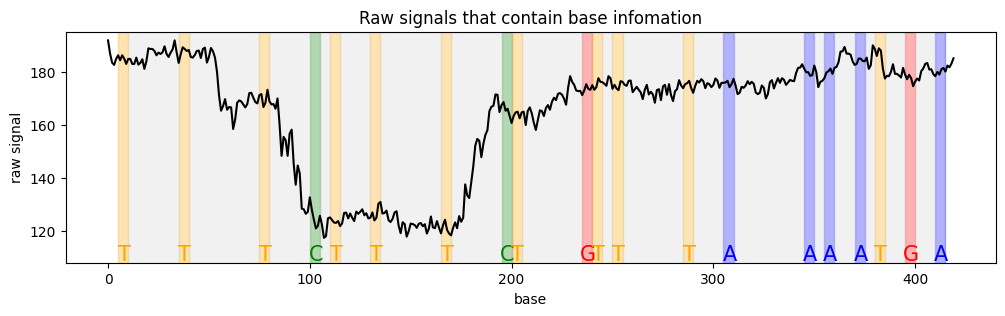

In [70]:
import matplotlib.pyplot as plt

# 假设有以下的纳米孔信号和碱基序列数据
# signal = [80, 85, 90, 88, 87, 100, 110, 90, 120, 85, 75, 95, 100, 110, 90]  # 电信号数据
bases = [x for x in f.seq[st:ed]]  # 碱基序列
colors = { "A":'blue', "C":'green', "G":'red', "T":'orange'}  # 每个碱基类型的颜色
base_loc = base2signal[st:ed] - base2signal[st]

# 绘制折线图
plt.figure(figsize=(12,3))
plt.plot(signal[base2signal[st] - 5 : base2signal[ed] + 5], color='black')

# 手动为每个碱基在相应的位置添加颜色标签
for i, base in enumerate(bases):
    color = colors[base]  # 循环使用颜色列表
    # plt.plot(list(np.arange(base_loc[i] ,base_loc[i] + 5)), signal[base_loc[i] + base2signal[st] : base_loc[i] + 5 + base2signal[st]], color=color)
    plt.text(
        base_loc[i] + 8
        # i*22
        ,
        109, base, color=color, fontsize=15, ha='center')  # 55为基线高度
    plt.axvspan(base_loc[i] + 5, base_loc[i] + 10, color = color, alpha=0.3)
for i in range(len(base_loc) - 1):
    plt.axvspan(base_loc[i] + 10, base_loc[i+1] + 5, color='lightgray', alpha=0.2)

# 设置y轴范围和标签
plt.ylim(108, 195)
plt.ylabel('raw signal')
plt.xlabel("base")
plt.title("Raw signals that contain base infomation")
# 显示图形
plt.show()